<a href="https://colab.research.google.com/github/freddy120/heart_disease_ML/blob/main/Proyecto_MIAD_Jorge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto final Introducción al Machine Learning

## Modelo de aprendizaje automático para predecir falla cardíaca

Grupo 2. 

* Freddy Rodrigo Mendoza Ticona. 
* William Alexander Romero Bolívar. 
* Maria Paula Salamanca Delgado. 
* Jorge Oswaldo Suárez Rodríguez. 

#1.Formulación de una pregunta de interés enmarcada en una organización

La falla cardíaca (FC) es un síndrome clínico caracterizado por el compromiso funcional y estructural del corazón, manifestado en síntomas como dificultad respiratoria y fatiga. No existe un examen único que sirva como estándar de oro diagnóstico. Los criterios diagnósticos incluyen datos de la historia clínica, el examen físico y pruebas de laboratorio. Se estima que hay más de 23 millones de personas con FC en todo el mundo 1,2.  Para el año 2016, la American Heart Association calculó 6,2 millones de pacientes en Estados Unidos y para Colombia, la Sociedad Colombiana de Cardiología estimó una prevalencia del 2,3%, cerca de 1,1 millones de personas 1,2,3. Las enfermedades cardiovasculares son la principal causa de mortalidad en el mundo, representando hasta el 31% de todas las muertes, y los costos para los sistemas de salud solo para FC en Estados Unidos rondaron los $30,7 mil millones de dólares en 2012 1,2. 

Predecir FC es de vital importancia para los pacientes, los centros de atención médica y las aseguradoras. Sin embargo, la capacidad de evaluar con precisión los resultados en pacientes con FC es difícil. Para su clasificación existen combinación de puntajes de riesgo y biomarcadores con rendimiento diagnóstico AUC de hasta 0,74 4. De esta manera, detectar FC representa una gran ventaja en la atención temprana de pacientes en riesgo, disminuyendo la morbimortalidad y los costos que se generan en el sistema de salud. Así, se formula la pregunta ***¿puede un modelo de aprendizaje automático predecir con mayor precisión el diagnóstico de falla cardíaca en comparación a los puntajes de riesgo?***. Este proyecto tiene como objetivo implementar un modelo que logre predecir con precisión un diagnóstico de FC, que pueda ser aplicado y probado en Centros de Atención Médica de Colombia, generando valor agregado en la atención de sus pacientes.  

Para resolver esta pregunta, dada la ausencia de datos de FC de público acceso en Colombia, se eligió una base de datos para investigación de libre acceso obtenida de IEEE Data Port 5, conformada por información de cinco centros de salud cardiovascular (Cleveland 303 registros, Hungría 294 registros, Suiza 123 registros, Long Beach VA 200 registros y Stalog 270 registros), en la cual se encuentran 11 características relacionadas a riesgo de FC. 

Dataset: https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive

# 2.Exploración de los datos para su entendimiento dentro del contexto organizacional

## Instalaciones e importaciones

In [1]:
!pip install pygam

     |████████████████████████████████| 1.8 MB 7.3 MB/s 


In [2]:
!pip install tpot

     |████████████████████████████████| 87 kB 2.2 MB/s 
     |████████████████████████████████| 160 kB 14.1 MB/s 
     |████████████████████████████████| 173.6 MB 8.5 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=b3848e65f194ae2dfd3addfd2c80ce37773cd81ea1e33dab1274303d0f20ce74
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [3]:
!pip install boruta

     |████████████████████████████████| 56 kB 158 kB/s 


In [44]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from boruta import BorutaPy
import missingno as msno
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.svm import SVC

import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
from keras import layers

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model

pd.set_option("display.max_columns", None)


from sklearn.feature_selection import f_regression, SelectKBest, mutual_info_regression, mutual_info_classif, RFE, SelectFromModel, SequentialFeatureSelector
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.feature_selection import f_regression, SelectKBest

import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

## Carga y exploración de los datos 

In [45]:
heart_df = pd.read_csv("heart.csv")
print('Dimension dataset: ', heart_df.shape)

Dimension dataset:  (918, 12)


In [46]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [47]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [48]:
numeric_features = heart_df.select_dtypes(exclude=['category', object]).columns.values 
categorical_features = heart_df.select_dtypes(include=['category', object]).columns.values

In [49]:
heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [50]:
heart_df['HeartDisease'].unique()

array([0, 1])

In [51]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [52]:
heart_df = heart_df[heart_df['RestingBP'] != 0]
heart_df = heart_df[heart_df['Cholesterol'] != 0]
print(heart_df.shape)

(746, 12)


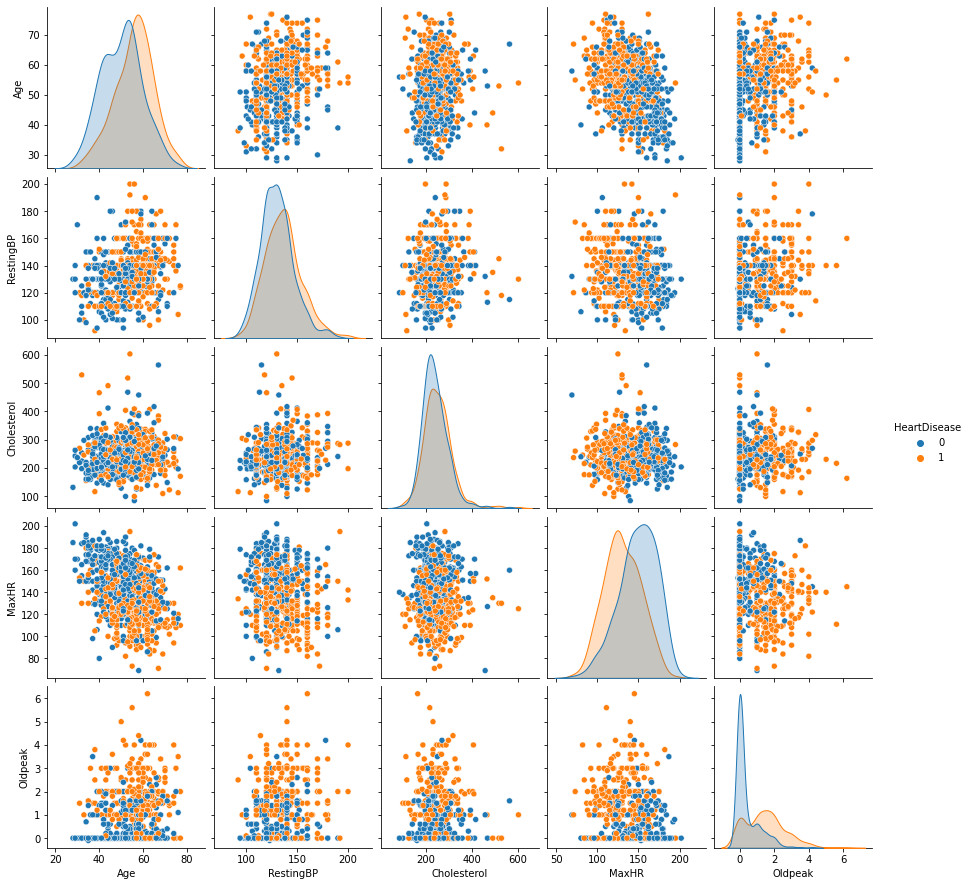

In [53]:
sns.pairplot(heart_df[numeric_features[~np.isin(numeric_features, ['FastingBS'])]], hue='HeartDisease')

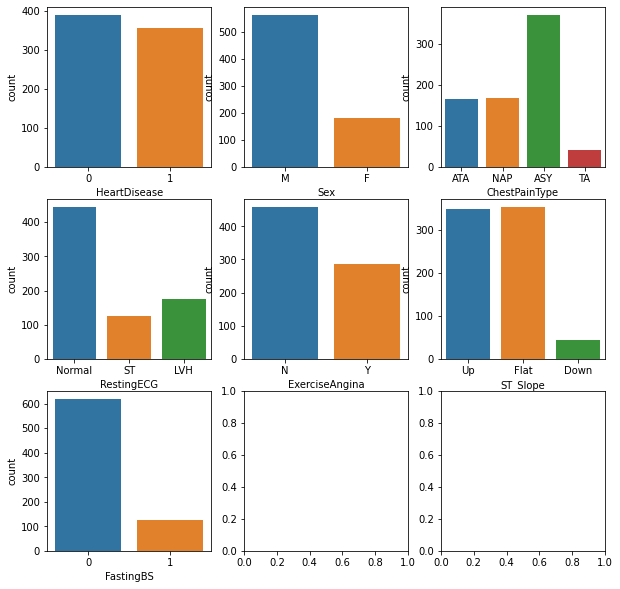

In [54]:
fig, axes=plt.subplots(3,3, figsize=(10, 10))
sns.countplot(x = 'HeartDisease', data = heart_df, ax=axes[0,0])
sns.countplot(x = 'Sex', data = heart_df, ax=axes[0,1])
sns.countplot(x = 'ChestPainType', data = heart_df, ax=axes[0,2])
sns.countplot(x = 'RestingECG', data = heart_df, ax=axes[1,0])
sns.countplot(x = 'ExerciseAngina', data = heart_df, ax=axes[1,1])
sns.countplot(x = 'ST_Slope', data = heart_df, ax=axes[1,2])
sns.countplot(x = 'FastingBS', data = heart_df, ax=axes[2,0])

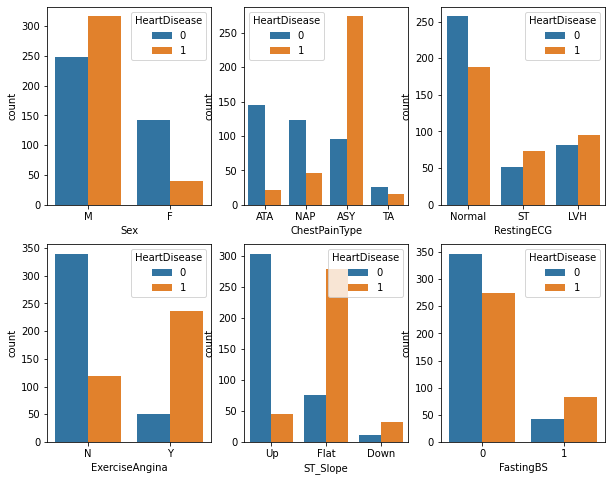

In [55]:
fig, axes=plt.subplots(2,3, figsize=(10, 8))
sns.countplot(x = 'Sex', data = heart_df, ax=axes[0,0], hue='HeartDisease')
sns.countplot(x = 'ChestPainType', data = heart_df, ax=axes[0,1], hue='HeartDisease')
sns.countplot(x = 'RestingECG', data = heart_df, ax=axes[0,2], hue='HeartDisease')
sns.countplot(x = 'ExerciseAngina', data = heart_df, ax=axes[1,0], hue='HeartDisease')
sns.countplot(x = 'ST_Slope', data = heart_df, ax=axes[1,1], hue='HeartDisease')
sns.countplot(x = 'FastingBS', data = heart_df, ax=axes[1,2], hue='HeartDisease')

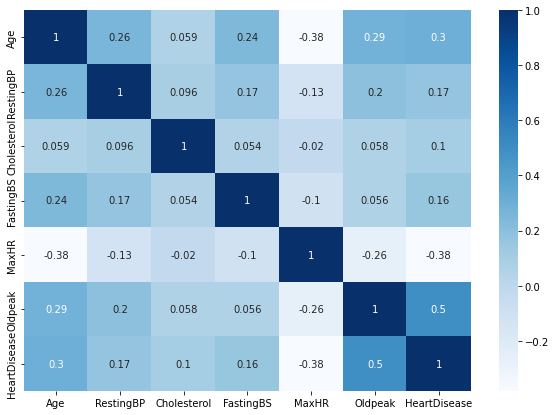

In [56]:
plt.figure(figsize=(10,7))
sns.heatmap(heart_df.corr(), annot=True,cmap='Blues')
plt.show()

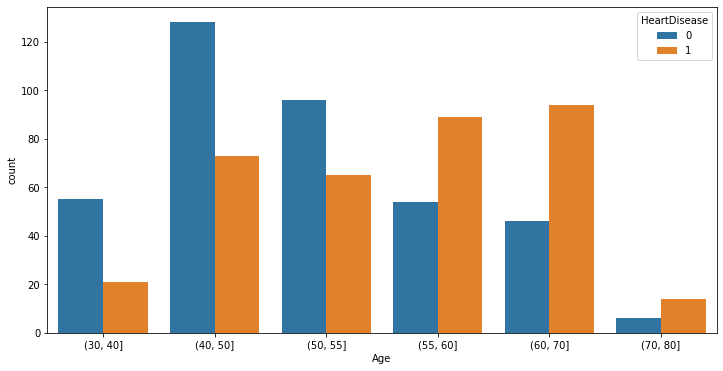

In [57]:
plt.figure(figsize=(12,6))
bins=[30,40,50,55,60,70,80]
sns.countplot(x=pd.cut(heart_df.Age,bins=bins),hue=heart_df.HeartDisease)
plt.show()

In [58]:
Ytotal_df = heart_df['HeartDisease']
Xtotal_df = heart_df.drop(columns=["HeartDisease"])

## Partición de datos en entrenamiento y prueba

In [59]:
XTrain_df, XTest_df, yTrain_df, yTest_df = train_test_split(Xtotal_df, Ytotal_df, test_size=0.33, random_state=0, 
                                                            stratify=Ytotal_df)

verificar que ambos Train y Test mantienen la mismas distribuciones

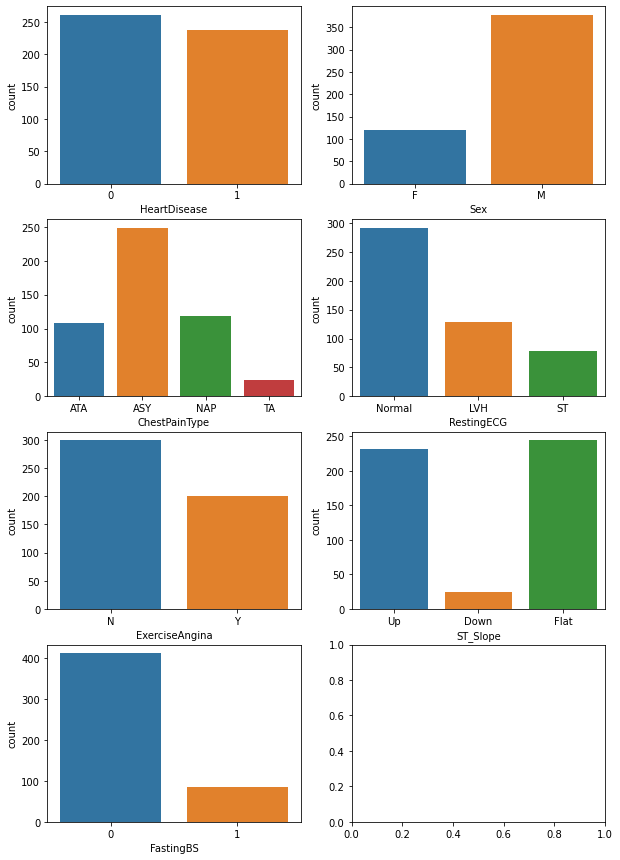

In [60]:
fig, axes=plt.subplots(4,2, figsize=(10, 15))
sns.countplot(x = 'HeartDisease', data = pd.DataFrame(yTrain_df), ax=axes[0,0])
sns.countplot(x = 'Sex', data = XTrain_df, ax=axes[0,1])
sns.countplot(x = 'ChestPainType', data = XTrain_df, ax=axes[1,0])
sns.countplot(x = 'RestingECG', data = XTrain_df, ax=axes[1,1])
sns.countplot(x = 'ExerciseAngina', data = XTrain_df, ax=axes[2,0])
sns.countplot(x = 'ST_Slope', data = XTrain_df, ax=axes[2,1])
sns.countplot(x = 'FastingBS', data = XTrain_df, ax=axes[3,0])

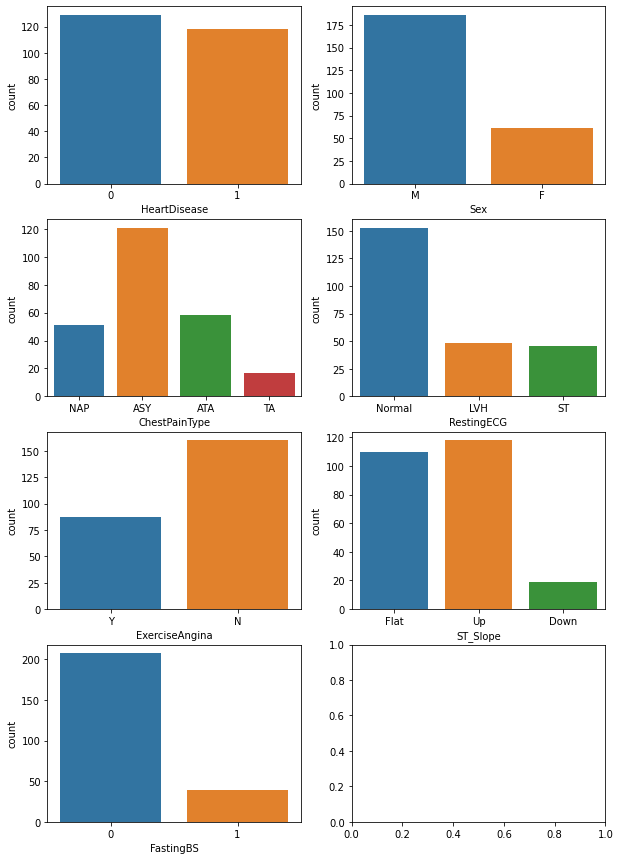

In [61]:
fig, axes=plt.subplots(4,2, figsize=(10, 15))
sns.countplot(x = 'HeartDisease', data = pd.DataFrame(yTest_df), ax=axes[0,0])
sns.countplot(x = 'Sex', data = XTest_df, ax=axes[0,1])
sns.countplot(x = 'ChestPainType', data = XTest_df, ax=axes[1,0])
sns.countplot(x = 'RestingECG', data = XTest_df, ax=axes[1,1])
sns.countplot(x = 'ExerciseAngina', data = XTest_df, ax=axes[2,0])
sns.countplot(x = 'ST_Slope', data = XTest_df, ax=axes[2,1])
sns.countplot(x = 'FastingBS', data = XTest_df, ax=axes[3,0])

## Interpretación

Teniendo en cuenta que el objetivo de este proyecto es tener un modelo que sea capaz de predecir si un paciente presenta una afección cardíaca, se tomaron ciertos atributos del paciente para usarlos como predictores, como se muestra a continuación: 

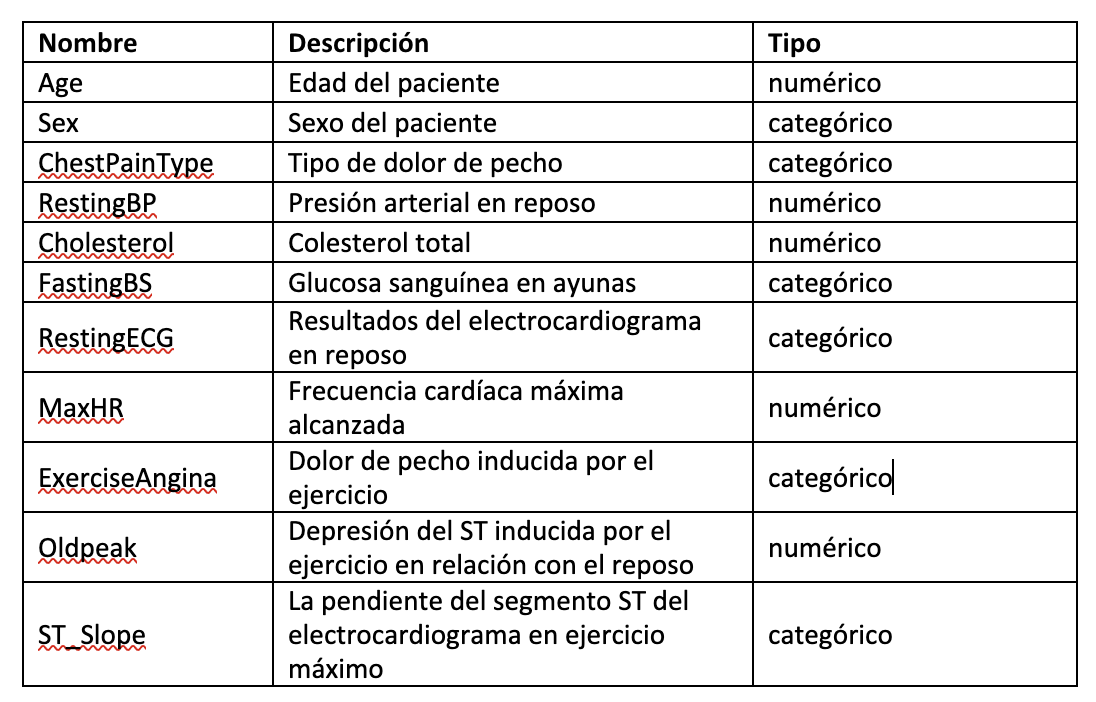

Las variables anteriores serán usadas para la predicción de la variable de salida HeartDisease. 

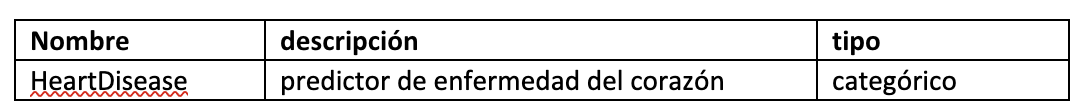

Las 11 variables predictoras fueron seleccionadas de un conjunto de 75 por los especialistas en enfermedades cardíacas, con las cuales se podría predecir si el paciente presenta FC o no. Los tipos de modelos que construiremos para este problema son de clasificación. 

Al realizar el análisis exploratorio, se encontró que el rango de edad de los pacientes entre 28 a 77 años, siendo el promedio 53 años.

Adicionalmente, a través de correlogramas se puede notar que la edad y la frecuencia cardiaca son factores que tienen una relación directa sobre la predicción de una enfermedad cardiaca. Por otro lado, las distribuciones de las edades y presión arterial en reposo se asemejan a una normal, y las variables predictoras no estan correlacionadas entre sí.

En cuanto al análisis de variables categóricas, se encontró que existe mayor cantidad de pacientes masculinos que presentan FC comparado a las pacientes femeninas, el dolor de pecho inducido por el ejercicio y ASY (asintomático) están relacionados a la presencia de FC, mientras que el tipo de dolor ATA (angina atípica) no.

Por último, se observó que los datos están relativamente balanceados en la variable objetivo, lo cual permitirá construir un mejor modelo. Por el contrario, el sexo de los pacientes no se encuentra balanceado: existe una mayor cantidad de registros de pacientes masculinos que de femeninos. 


# 3.Preparación de los datos para poder utilizarlos como entrada para modelos predictivos. 

Con el objetivo de predecir la probabilidad de que una persona desarrolle FC, se estimará un modelo de clasificación con HeartDisease como variable de respuesta. Para esto se preparan los datos de tal manera que se puedan utilizar en modelos predictivos de este tipo, se realiza un balanceo de clases pues observa que en el set de datos inicial una clase tiene mas observaciones que la otra y se convirtieron a dummies las variables categóricas relacionadas a sexo, tipo de dolor en el pecho, glucosa sanguínea en ayunas, resultado de electrocardiograma en reposo, dolor de pecho por ejercicio y pendiente del ST del electrocardiograma en ejercicio máximo. Dado que no se encontraron datos nulos, no se requiere imputación de datos faltantes. 

 

Por último, para la estimación del modelo se dividirá la base elegida en muestra de entrenamiento (67%) y de validación (33%).

## codificacion de variables categoricas

In [62]:
# funciones util
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=int)
        X_mask = np.ones_like(X, dtype=bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

# A class to select numerical or categorical columns
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [63]:
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'] 
       
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS']

numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(numeric_features)),
])

categorical_pipeline= Pipeline([
    ("select_cat", DataFrameSelector(categorical_features)),
    ("cat_encoder", CategoricalEncoder(encoding='onehot-dense'))
])

preprocess_pipeline = FeatureUnion(transformer_list=[
    ("numerical_pipeline", numerical_pipeline),             
    ("categorical_pipeline", categorical_pipeline),
])


XTrain = preprocess_pipeline.fit_transform(XTrain_df)
XTest = preprocess_pipeline.transform(XTest_df)

columns_ohe = np.array([])
for i,val in enumerate(categorical_pipeline[1].categories_):
  columns_ohe = np.append(columns_ohe, categorical_features[i]+"_"+val)

columns_ohe = columns_ohe.tolist()

XTrain_df = pd.DataFrame(XTrain, columns=(numeric_features+columns_ohe))
XTest_df = pd.DataFrame(XTest, columns=(numeric_features+columns_ohe))

# dummy encoding, drop first column
XTrain_df = XTrain_df.drop(columns=['Sex_F', 'ChestPainType_ASY', 'RestingECG_LVH','ExerciseAngina_N', 'ST_Slope_Down'])
XTest_df = XTest_df.drop(columns=['Sex_F', 'ChestPainType_ASY', 'RestingECG_LVH','ExerciseAngina_N', 'ST_Slope_Down'])

In [ ]:
XTrain_df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,62.0,140.0,268.0,160.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41.0,130.0,172.0,130.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,57.0,124.0,261.0,141.0,0.3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,64.0,143.0,306.0,115.0,1.8,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,41.0,130.0,245.0,150.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
XTest_df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,52.0,128.0,205.0,184.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,55.0,120.0,256.0,137.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,59.0,110.0,0.0,94.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,50.0,170.0,209.0,116.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,41.0,120.0,157.0,182.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Imputacion de datos faltantes

In [64]:
XTrain_df.isnull().sum()

Age                  0
RestingBP            0
Cholesterol          0
MaxHR                0
Oldpeak              0
FastingBS            0
Sex_M                0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_Y     0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64

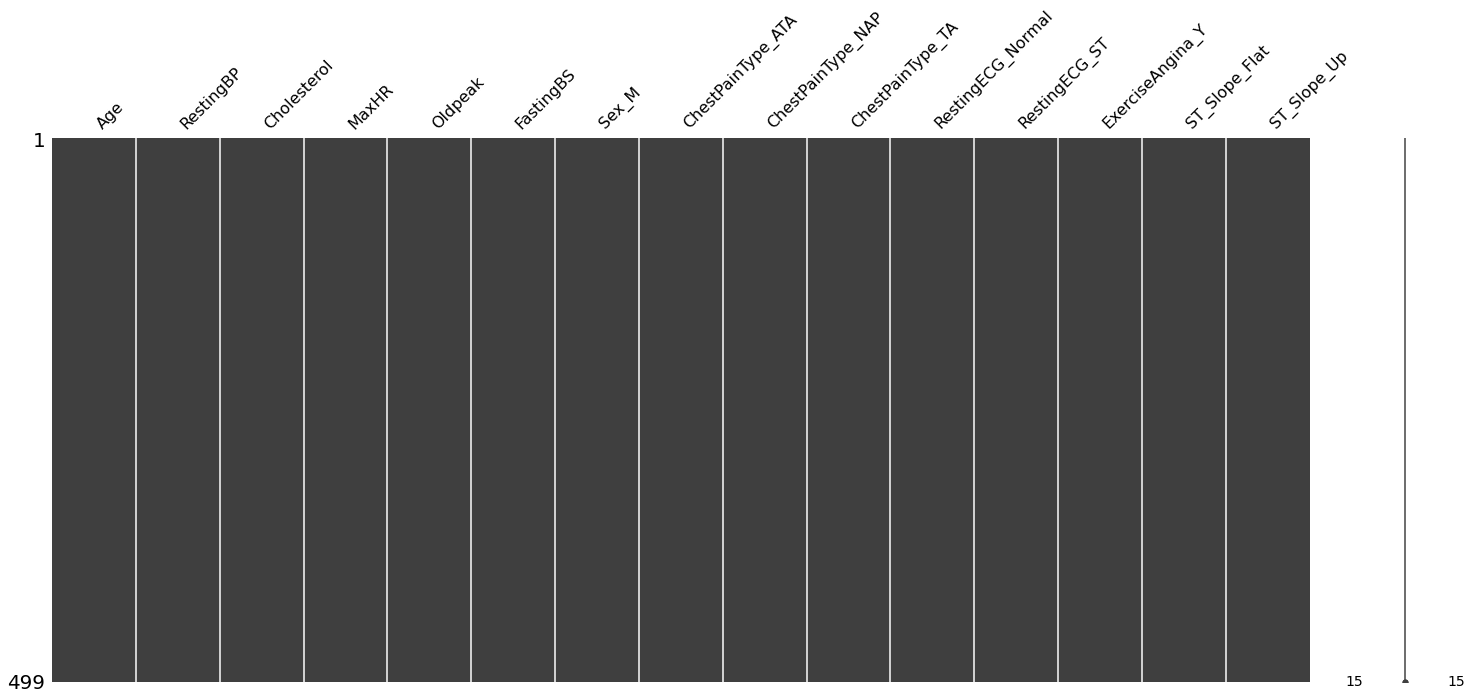

In [65]:
msno.matrix(XTrain_df)

No tenemos datos faltantes

## Balanceo de datos

In [66]:
print(f"Distribucion de clases antes del SMOTE: \n{yTrain_df.value_counts()}")

cat_variables_idx = [5,6,7,8,9,10,11,12,13,14]

oversample = SMOTENC(categorical_features=cat_variables_idx, sampling_strategy='all')
XTrain_df, yTrain_df = oversample.fit_resample(XTrain_df,yTrain_df)

print(f"Distribucion de clases despues del SMOTE: \n{yTrain_df.value_counts()}")

Distribucion de clases antes del SMOTE: 
0    261
1    238
Name: HeartDisease, dtype: int64
Distribucion de clases despues del SMOTE: 
0    261
1    261
Name: HeartDisease, dtype: int64


# 4.Análisis preliminar de selección de modelos relevantes para responder a la pregunta

De acuerdo a la definición del problema predictivo planteado, se argumenta qué modelos predictivos son candidatos a utilizarse para solucionar la pregunta de interés en el respectivo contexto organizacional, en ese orden de ideas se busca resolver el problema por medio de de modelos que permitan abordar un problema de clasificacion. Con lo cual con fines comparativos y buscando optener el mejor resultado de este ejercicio se entrenan varios modelos de clasificacion y al final se comparara el resultado de cada uno de ellos buscando elejir el que ofrezca mejores resultados de cara al problema planteado.

Entre los modelos a entrenar y comparar tenemos los siguientes:

*   Regresión Logística  
*   Random Forest  
*   Gradient Boosting  
*   Bagging
*   SVM (lineal)  
*   SVM (lineal) + Envoltura (RFE)
*   SVM (lineal) + Envoltura (SelectfromModel)
*   SVM (lineal) + Envoltura (Boruta)
*   SVM (lineal) + filtro  
*   SVM (radial)
*   Red Neuronal
*   Logistic GAM





#5.Desarrollo y calibración de modelos

## Selección y Extracción de variables:

### Metodo de filtrado





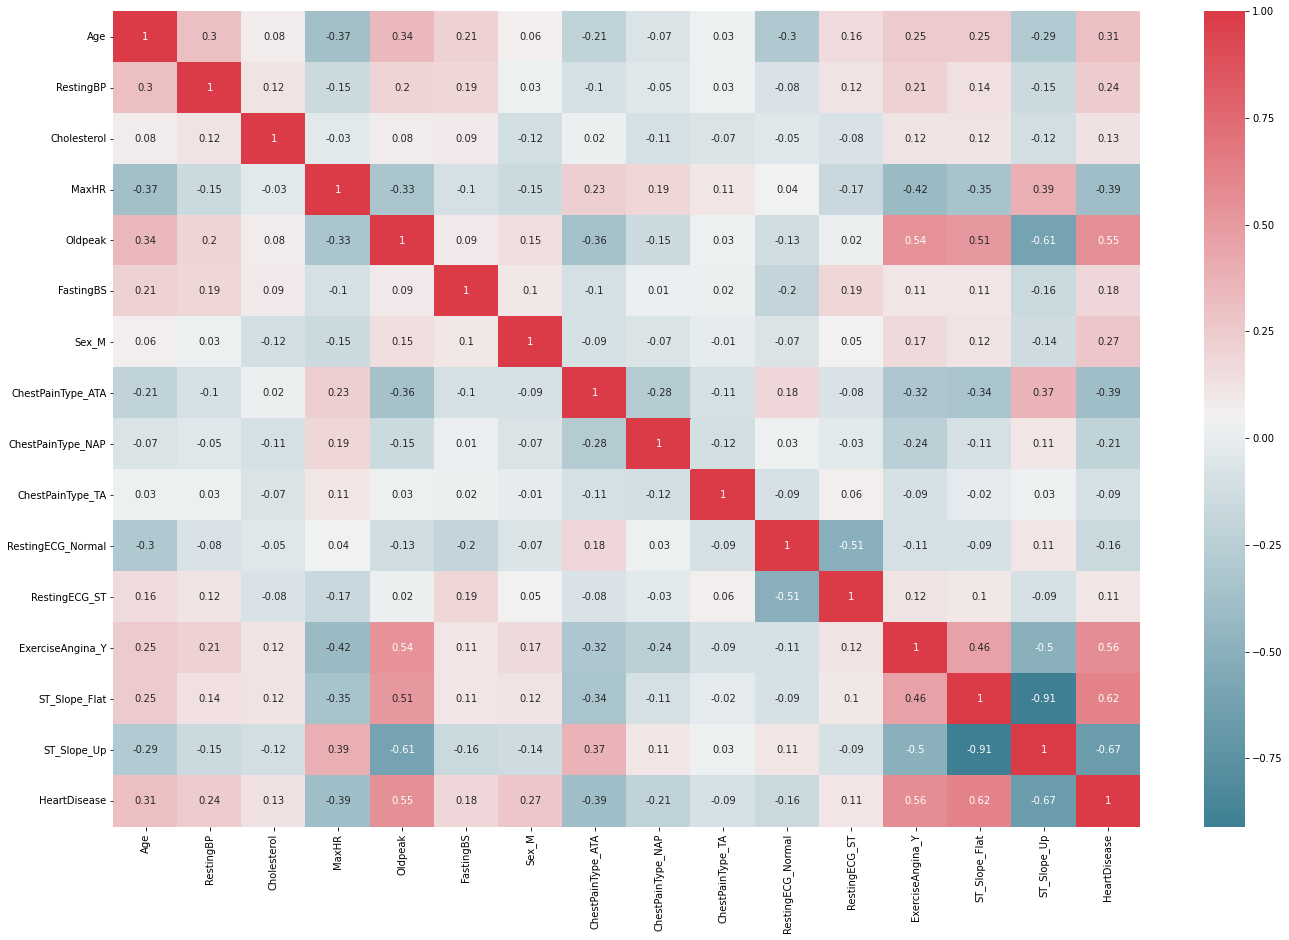

In [67]:
train_all_df = pd.concat([XTrain_df, pd.DataFrame(yTrain_df).reset_index(drop=True)], axis=1)

correlation_matrix = train_all_df.corr(method='spearman').round(2)
fig,axes = plt.subplots(1,1,figsize=(23,15))
sns.heatmap(data=correlation_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True,ax=axes)

no hay correlaciones importantes

Informacion mutua con la variable de salida

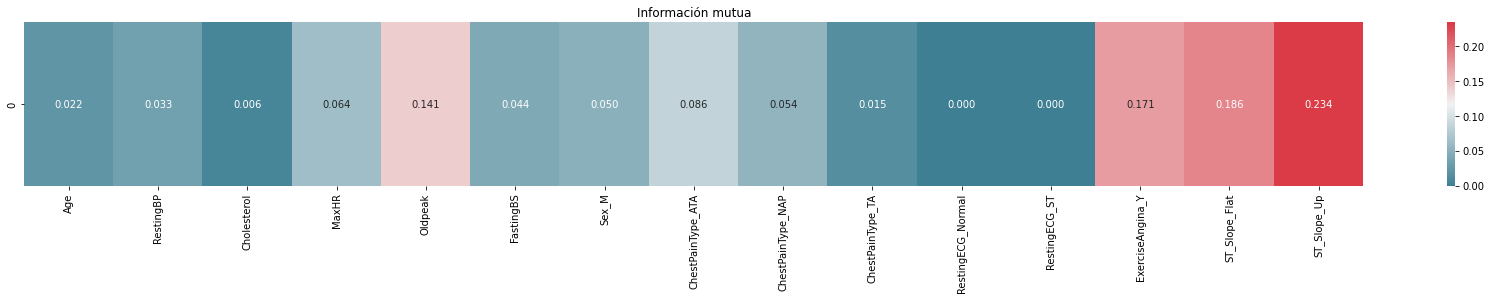

In [68]:
mu_inf = mutual_info_classif(XTrain_df, yTrain_df.values,discrete_features=False)

fig, ax = plt.subplots(1,1, figsize=(30,3))
ax.set_title('Información mutua')
sns.heatmap([mu_inf],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".3f")
ax.set_xticklabels(XTrain_df.columns.to_list())
ax.tick_params(axis='x', rotation=90)

Variables seleccionadas: ['Age' 'RestingBP' 'MaxHR' 'Oldpeak' 'FastingBS' 'Sex_M'
 'ChestPainType_ATA' 'ChestPainType_NAP' 'RestingECG_ST'
 'ExerciseAngina_Y' 'ST_Slope_Flat' 'ST_Slope_Up']


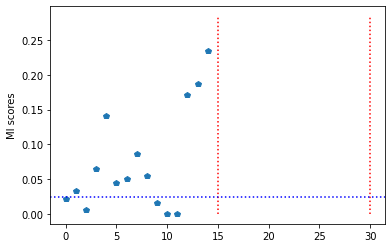

In [69]:
plt.plot(mu_inf,'p')
plt.vlines(x=[15,30],ymin=0,ymax=np.max(mu_inf)+0.05,ls=':',colors='r')
plt.axhline(y=0.025,ls=':',color='b')  #Threshold
plt.ylabel('MI scores')

selectKbest_mi = SelectKBest(mutual_info_classif, k=12)
selectKbest_mi.fit(XTrain_df, yTrain_df)

print("Variables seleccionadas: {}".format(XTrain_df.columns.to_numpy()[selectKbest_mi.get_support()]))

### metodos de envoltura

In [70]:
# boruta
rf = RandomForestClassifier()
rf.fit(XTrain_df, yTrain_df)
selector_boruta = BorutaPy(rf, n_estimators='auto', random_state=1)
selector_boruta.fit(XTrain_df.values, yTrain_df.values)
print("variables seleccionadas: {}".format(XTrain_df.columns.to_numpy()[selector_boruta.support_]))


variables seleccionadas: ['Age' 'RestingBP' 'MaxHR' 'Oldpeak' 'ExerciseAngina_Y' 'ST_Slope_Flat'
 'ST_Slope_Up']


In [71]:
#RFE
selector_rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=12, step=1)
selector_rfe = selector_rfe.fit(XTrain_df, yTrain_df) # esto puede tardar algunos minutos

print("variables seleccionadas: {}".format(XTrain_df.columns.to_numpy()[selector_rfe.support_]))

variables seleccionadas: ['Age' 'RestingBP' 'Cholesterol' 'MaxHR' 'Oldpeak' 'Sex_M'
 'ChestPainType_ATA' 'ChestPainType_NAP' 'RestingECG_Normal'
 'ExerciseAngina_Y' 'ST_Slope_Flat' 'ST_Slope_Up']


In [72]:
#SelectFromModel
selector_sfm = SelectFromModel(estimator=RandomForestClassifier())
selector_sfm.fit(XTrain_df, yTrain_df)

print("variables seleccionadas: {}".format(XTrain_df.columns.to_numpy()[selector_sfm.get_support()]))


variables seleccionadas: ['Age' 'RestingBP' 'Cholesterol' 'MaxHR' 'Oldpeak' 'ExerciseAngina_Y'
 'ST_Slope_Flat' 'ST_Slope_Up']


## Regresión lógistica

seleccion de hypeparametros (calibracion)

In [85]:
param = {'penalty': ['l1', 'l2'],
         'C': np.logspace(-4, 4, 20),
         'solver': ['saga', 'liblinear']}

grid_search=GridSearchCV(estimator=LogisticRegression(),param_grid=param,cv=5,n_jobs=-1,verbose=2, scoring = 'roc_auc')
grid_search.fit(XTrain_df, yTrain_df)

print(grid_search.best_estimator_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
LogisticRegression(C=1.623776739188721, solver='liblinear')


Matriz de confusión
[[112  17]
 [ 21  97]]
accuracy
0.8461538461538461
precision
0.8462959016975637
F1 score: 0.8362068965517241


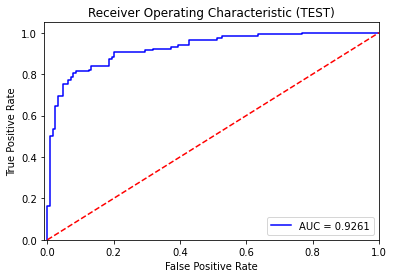

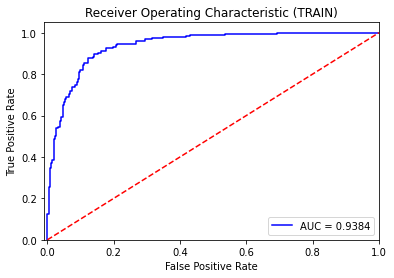

In [86]:
clf = LogisticRegression(C=1.623776739188721, solver='liblinear', random_state=0)
clf.fit(XTrain_df, yTrain_df)

pred = clf.predict(XTest_df)

print("Matriz de confusión")
print(confusion_matrix(y_true=yTest_df, y_pred=pred))
accuracy=accuracy_score(y_true=yTest_df, y_pred=pred)
print("accuracy")
print(accuracy)
precision=precision_score(y_true=yTest_df, y_pred=pred,average="weighted")
print("precision")
print(precision)
RF1 = metrics.f1_score(yTest_df,pred)
print("F1 score: " + str(RF1))


prediccionesProb=clf.predict_proba(XTest_df)
fpr, tpr, thresholds = metrics.roc_curve(yTest_df, prediccionesProb[:,1], pos_label=1)
AUC_lr = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic (TEST)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


prediccionesProb=clf.predict_proba(XTrain_df)
fpr, tpr, thresholds = metrics.roc_curve(yTrain_df, prediccionesProb[:,1], pos_label=1)
plt.title('Receiver Operating Characteristic (TRAIN)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' %  metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

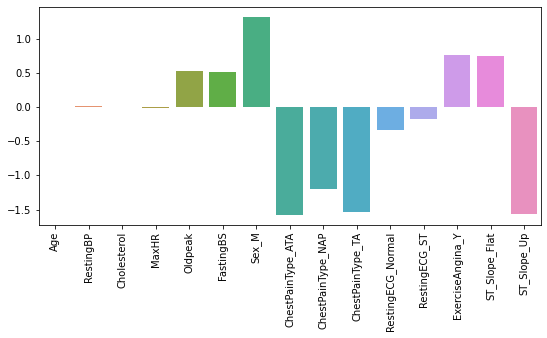

In [76]:
fig, axes=plt.subplots(1,1, figsize=(9, 4))
sns.barplot(x = XTrain_df.columns.to_numpy(), y= clf.coef_.ravel(), ax=axes)
axes.set_xticklabels(XTrain_df.columns.to_numpy(), rotation=90)
axes

## RandomForest

seleccion de hyperparametros

In [77]:
from tpot import TPOTClassifier

n_estimators = [int(x) for x in np.linspace(start = 30, stop = 300, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(2, 30, 20)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]

param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}

tpot = TPOTClassifier(generations=5, population_size=24, early_stop= 12, verbosity=2, random_state=42, 
                      config_dict={'sklearn.ensemble.RandomForestClassifier': param}, 
                      cv = 4, scoring = 'roc_auc')
tpot.fit(XTrain_df.values, yTrain_df.values)

Optimization Progress:   0%|          | 0/144 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.927961269499731

Generation 2 - Current best internal CV score: 0.9290891160121929

Generation 3 - Current best internal CV score: 0.9290891160121929

Generation 4 - Current best internal CV score: 0.9290891160121929

Generation 5 - Current best internal CV score: 0.9290891160121929

Best pipeline: RandomForestClassifier(input_matrix, criterion=gini, max_depth=27, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=180)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [2,
                                                                                      3,
                                                                                      4,
                                                                                      6,
                                                                                      7,
                                                                                      9,
                                                                                      10,
                                                                                      12,
                                                                                      13,
    

Matriz de confusión
[[111  18]
 [ 16 102]]
accuracy
0.8623481781376519
precision
0.8625426376358826
F1 score: 0.8571428571428572


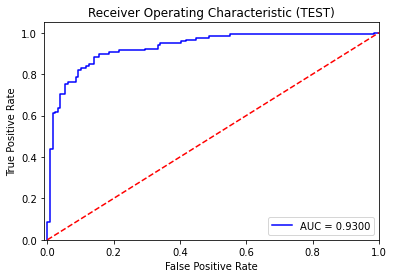

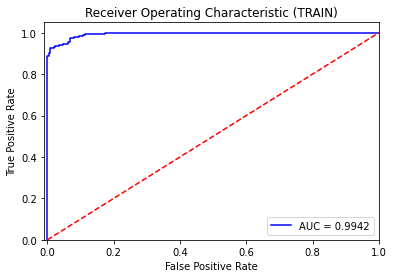

In [104]:
clf = RandomForestClassifier(criterion='gini', max_depth=27, max_features='sqrt', 
                             min_samples_leaf=2, min_samples_split=5, n_estimators=180, random_state=0)
clf.fit(XTrain_df, yTrain_df)

pred = clf.predict(XTest_df)

print("Matriz de confusión")
print(confusion_matrix(y_true=yTest_df, y_pred=pred))
accuracy=accuracy_score(y_true=yTest_df, y_pred=pred)
print("accuracy")
print(accuracy)
precision=precision_score(y_true=yTest_df, y_pred=pred,average="weighted")
print("precision")
print(precision)
RF1 = metrics.f1_score(yTest_df,pred)
print("F1 score: " + str(RF1))

prediccionesProb=clf.predict_proba(XTest_df)
fpr, tpr, thresholds = metrics.roc_curve(yTest_df, prediccionesProb[:,1], pos_label=1)
AUC_rf = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic (TEST)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


prediccionesProb=clf.predict_proba(XTrain_df)
fpr, tpr, thresholds = metrics.roc_curve(yTrain_df, prediccionesProb[:,1], pos_label=1)
plt.title('Receiver Operating Characteristic (TRAIN)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




## Gradient Boosting

In [80]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "squared_error"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10, 50, 100]
    }

rf_randomcv=RandomizedSearchCV(estimator=GradientBoostingClassifier(),param_distributions=parameters,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1, scoring='roc_auc')
rf_randomcv.fit(XTrain_df, yTrain_df)

print(rf_randomcv.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
GradientBoostingClassifier(learning_rate=0.15, max_depth=8, max_features='log2',
                           min_samples_leaf=0.1,
                           min_samples_split=0.42727272727272736,
                           n_estimators=50, subsample=0.95)


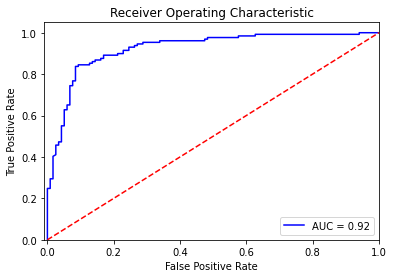

Matriz de confusión
[[113  16]
 [ 19  99]]
accuracy
0.8582995951417004
precision
0.8583580035525117
F1 score: 0.849785407725322


In [81]:
clfGB= GradientBoostingClassifier(learning_rate=0.15, max_depth=8, max_features='log2',
                           min_samples_leaf=0.1,
                           min_samples_split=0.42727272727272736,
                           n_estimators=50, subsample=0.95, random_state=0)
clfGB.fit(XTrain_df, yTrain_df)

pred=clfGB.predict(XTest_df)
prediccionGB=clfGB.predict_proba(XTest_df)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df, prediccionGB, pos_label=0)
AUCGB=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCGB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("Matriz de confusión")
print(confusion_matrix(y_true=yTest_df, y_pred=pred))

accuracy=accuracy_score(y_true=yTest_df, y_pred=pred)
print("accuracy")
print(accuracy)

precision=precision_score(y_true=yTest_df, y_pred=pred,average="weighted")
print("precision")
print(precision)
RF1 = metrics.f1_score(yTest_df,pred)
print("F1 score: " + str(RF1))

## Bagging

In [82]:
bc_params = {"base_estimator__max_depth": [3,5,10,20],
          "base_estimator__max_features": [None, "auto"],
          "base_estimator__min_samples_leaf": [1, 3, 5, 7, 10],
          "base_estimator__min_samples_split": [2, 5, 7],
          'bootstrap_features': [False, True],
          'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20]
          }

bc_gs = RandomizedSearchCV(BaggingClassifier(DecisionTreeClassifier()), bc_params, n_iter=100, cv=3, verbose=2, random_state=100,n_jobs=-1, scoring='roc_auc')
bc_gs.fit(XTrain_df, yTrain_df)
print(bc_gs.best_estimator_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        max_features='auto',
                                                        min_samples_leaf=7,
                                                        min_samples_split=7),
                  bootstrap_features=True, max_features=0.7, n_estimators=20)


Matriz de confusión
[[113  16]
 [ 21  97]]
accuracy
0.8502024291497976
precision
0.8505085728250297
F1 score: 0.8398268398268398


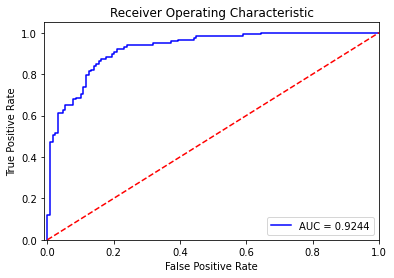

In [84]:
clfBag = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        max_features='auto',
                                                        min_samples_leaf=7,
                                                        min_samples_split=7),
                  bootstrap_features=True, max_features=0.7, n_estimators=20)
clfBag.fit(XTrain_df, yTrain_df)

print("Matriz de confusión")
print(confusion_matrix(y_true=yTest_df, y_pred=pred))
accuracy=accuracy_score(y_true=yTest_df, y_pred=pred)
print("accuracy")
print(accuracy)
precision=precision_score(y_true=yTest_df, y_pred=pred,average="weighted")
print("precision")
print(precision)
RF1 = metrics.f1_score(yTest_df,pred)
print("F1 score: " + str(RF1))

pred=clfBag.predict(XTest_df)
prediccionBag=clfBag.predict_proba(XTest_df)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df, prediccionBag, pos_label=1)
AUCBag=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUCBag)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



## Suport vector machine lineal

Matriz de confusión
[[111  18]
 [ 19  99]]
accuracy
0.8502024291497976
precision
0.8501712862036749
F1 score: 0.8425531914893616


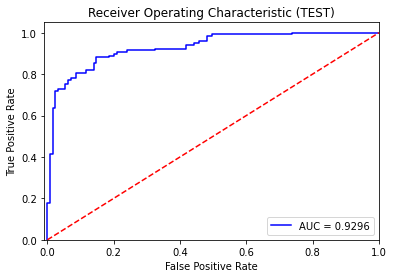

In [102]:
clf = SVC(kernel='linear',probability=True, random_state=0)
clf.fit(XTrain_df, yTrain_df)

pred=clf.predict(XTest_df)
print("Matriz de confusión")
print(confusion_matrix(y_true=yTest_df, y_pred=pred))
accuracy=accuracy_score(y_true=yTest_df, y_pred=pred)
print("accuracy")
print(accuracy)
precision=precision_score(y_true=yTest_df, y_pred=pred,average="weighted")
print("precision")
print(precision)
RF1 = metrics.f1_score(yTest_df,pred)
print("F1 score: " + str(RF1))

prediccionesProb=clf.predict_proba(XTest_df)
fpr, tpr, thresholds = metrics.roc_curve(yTest_df, prediccionesProb[:,1], pos_label=1)
AUC_svm_lineal = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic (TEST)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_svm_lineal)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## SVM + seleccion de variables por RFE 

Matriz de confusión
[[113  16]
 [ 17 101]]
accuracy
0.8663967611336032
precision
0.8663725388421745
F1 score: 0.8595744680851065


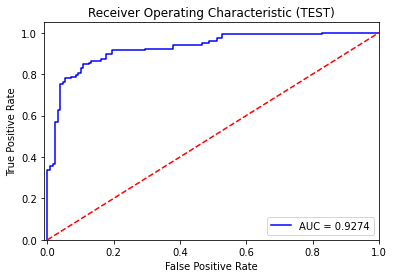

In [88]:
clf = SVC(kernel='linear',probability=True, random_state=0)
clf.fit(XTrain_df.loc[:,selector_rfe.support_], yTrain_df)

pred=clf.predict(XTest_df.loc[:,selector_rfe.support_])
prediccionesProb=clf.predict_proba(XTest_df.loc[:,selector_rfe.support_])

print("Matriz de confusión")
print(confusion_matrix(y_true=yTest_df, y_pred=pred))
accuracy=accuracy_score(y_true=yTest_df, y_pred=pred)
print("accuracy")
print(accuracy)
precision=precision_score(y_true=yTest_df, y_pred=pred,average="weighted")
print("precision")
print(precision)
RF1 = metrics.f1_score(yTest_df,pred)
print("F1 score: " + str(RF1))

fpr, tpr, thresholds = metrics.roc_curve(yTest_df, prediccionesProb[:,1], pos_label=1)
AUC_svm_lineal_fs1=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic (TEST)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_svm_lineal_fs1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##  SVM + seleccion de variables por SFM (SelectFromModel: selecting features based on importance weights)





Matriz de confusión
[[102  27]
 [ 16 102]]
accuracy
0.8259109311740891
precision
0.8291935229055325
F1 score: 0.825910931174089


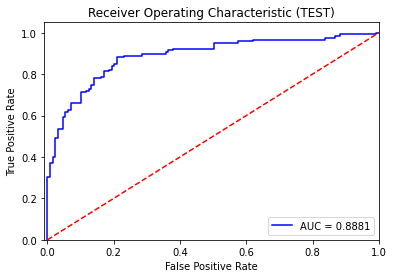

In [89]:
clf = SVC(kernel='linear',probability=True, random_state=0)
clf.fit(XTrain_df.loc[:,selector_sfm.get_support()], yTrain_df)

predicciones=clf.predict(XTest_df.loc[:,selector_sfm.get_support()])
prediccionesProb=clf.predict_proba(XTest_df.loc[:,selector_sfm.get_support()])


print("Matriz de confusión")
print(confusion_matrix(y_true=yTest_df, y_pred=predicciones))
accuracy=accuracy_score(y_true=yTest_df, y_pred=predicciones)
print("accuracy")
print(accuracy)
precision=precision_score(y_true=yTest_df, y_pred=predicciones,average="weighted")
print("precision")
print(precision)
RF1 = metrics.f1_score(yTest_df,predicciones)
print("F1 score: " + str(RF1))


fpr, tpr, thresholds = metrics.roc_curve(yTest_df, prediccionesProb[:,1], pos_label=1)
AUC_svm_lineal_fs2 =metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic (TEST)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_svm_lineal_fs2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## SVM + seleccion de variables por Boruta

Matriz de confusión
[[102  27]
 [ 16 102]]
accuracy
0.8259109311740891
precision
0.8291935229055325
F1 score: 0.825910931174089


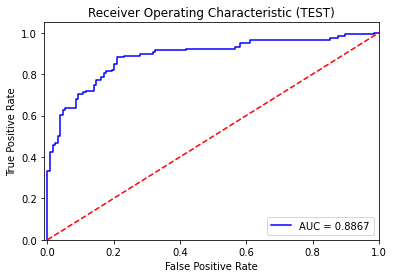

In [90]:
clf = SVC(kernel='linear',probability=True, random_state=0)
clf.fit(XTrain_df.loc[:,selector_boruta.support_], yTrain_df)

predicciones=clf.predict(XTest_df.loc[:,selector_boruta.support_])
prediccionesProb=clf.predict_proba(XTest_df.loc[:,selector_boruta.support_])


print("Matriz de confusión")
print(confusion_matrix(y_true=yTest_df, y_pred=predicciones))
accuracy=accuracy_score(y_true=yTest_df, y_pred=predicciones)
print("accuracy")
print(accuracy)
precision=precision_score(y_true=yTest_df, y_pred=predicciones,average="weighted")
print("precision")
print(precision)
RF1 = metrics.f1_score(yTest_df,predicciones)
print("F1 score: " + str(RF1))

fpr, tpr, thresholds = metrics.roc_curve(yTest_df, prediccionesProb[:,1], pos_label=1)
AUC_svm_lineal_boruta =metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic (TEST)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_svm_lineal_boruta)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SVM + Selección de variables por filtro 

Matriz de confusión
[[112  17]
 [ 17 101]]
accuracy
0.8623481781376519
precision
0.8623481781376519
F1 score: 0.8559322033898306


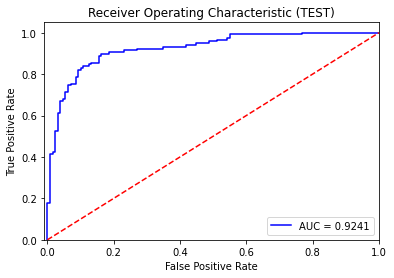

In [106]:
clf = SVC(kernel='linear',probability=True, random_state=0)
clf.fit(XTrain_df.loc[:,selectKbest_mi.get_support()], yTrain_df)

pred=clf.predict(XTest_df.loc[:,selectKbest_mi.get_support()])
prediccionesProb=clf.predict_proba(XTest_df.loc[:,selectKbest_mi.get_support()])

print("Matriz de confusión")
print(confusion_matrix(y_true=yTest_df, y_pred=pred))
accuracy=accuracy_score(y_true=yTest_df, y_pred=pred)
print("accuracy")
print(accuracy)
precision=precision_score(y_true=yTest_df, y_pred=pred,average="weighted")
print("precision")
print(precision)
RF1 = metrics.f1_score(yTest_df,pred)
print("F1 score: " + str(RF1))


fpr, tpr, thresholds = metrics.roc_curve(yTest_df, prediccionesProb[:,1], pos_label=1)
AUC_svm_lineal_mi =metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic (TEST)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_svm_lineal_mi)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SVM con kernel radial

Matriz de confusión
[[93 36]
 [41 77]]
accuracy
0.6882591093117408
precision
0.6880037667703901
F1 score: 0.6666666666666666


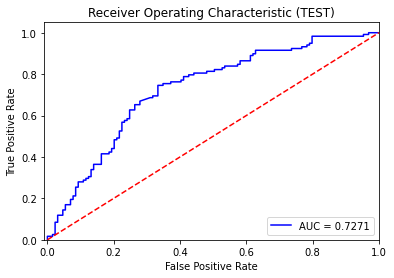

In [107]:
clf = SVC(kernel='rbf',probability=True,random_state=0)
clf.fit(XTrain_df, yTrain_df)

pred=clf.predict(XTest_df)
prediccionesProb=clf.predict_proba(XTest_df)

print("Matriz de confusión")
print(confusion_matrix(y_true=yTest_df, y_pred=pred))
accuracy=accuracy_score(y_true=yTest_df, y_pred=pred)
print("accuracy")
print(accuracy)
precision=precision_score(y_true=yTest_df, y_pred=pred,average="weighted")
print("precision")
print(precision)
RF1 = metrics.f1_score(yTest_df,pred)
print("F1 score: " + str(RF1))


fpr, tpr, thresholds = metrics.roc_curve(yTest_df, prediccionesProb[:,1], pos_label=1)
AUC_svm_radial = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic (TEST)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_svm_radial)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

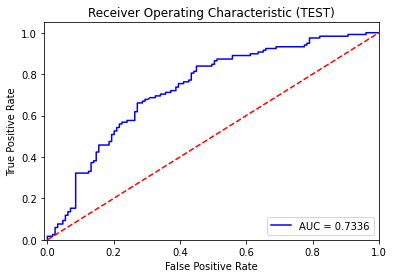

In [93]:
clf = SVC(kernel='rbf',probability=True,random_state=0)
clf.fit(XTrain_df.loc[:,selectKbest_mi.get_support()], yTrain_df)

prediccionesProb=clf.predict(XTest_df.loc[:,selectKbest_mi.get_support()])
prediccionesProb=clf.predict_proba(XTest_df.loc[:,selectKbest_mi.get_support()])

fpr, tpr, thresholds = metrics.roc_curve(yTest_df, prediccionesProb[:,1], pos_label=1)
AUC_svm_radial = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic (TEST)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_svm_radial)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Red Neuronal

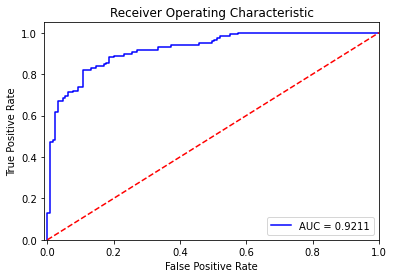

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       129
           1       0.87      0.82      0.84       118

    accuracy                           0.85       247
   macro avg       0.86      0.85      0.85       247
weighted avg       0.85      0.85      0.85       247



In [94]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-7, hidden_layer_sizes=(8,4,2), random_state=1,max_iter=10000)
clf.fit(XTrain_df, yTrain_df)

predicciones=clf.predict(XTest_df)
prediccionesProb=clf.predict_proba(XTest_df)

fpr, tpr, thresholds = metrics.roc_curve(yTest_df, prediccionesProb[:,1], pos_label=1)
AUC_RN=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_RN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


from sklearn.metrics import classification_report
print(classification_report(yTest_df,predicciones))

## Logistic GAM

In [95]:
XTrain_df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,63.0,140.0,195.0,179.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,62.0,160.0,164.0,145.0,6.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,54.0,130.0,294.0,100.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
3,62.0,135.0,297.0,130.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,70.0,170.0,192.0,129.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      40.289
Link Function:                        LogitLink Log Likelihood:                                  -143.4463
Number of Samples:                          522 AIC:                                              367.4704
                                                AICc:                                             374.7501
                                                UBRE:                                               2.7657
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.6035
Feature Function                  Lam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """


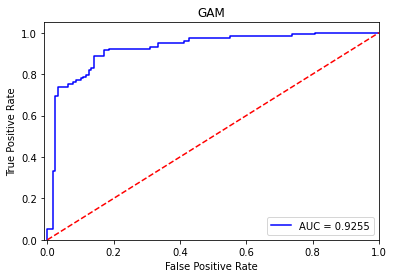

In [101]:
from pygam import LogisticGAM, s, f, l

classifier = LogisticGAM(terms=s(0)+s(1)+s(2)+s(3)+s(4)+l(5)+l(6)+l(7)+l(8)+l(9)+l(10)+l(11)+l(12)+l(13)+l(14))
classifier.fit(XTrain_df, yTrain_df)
classifier.summary()

pred_gam = classifier.predict(XTest_df)
print("Matriz de confusión")
print(confusion_matrix(y_true=yTest_df, y_pred=pred_gam))
accuracy=accuracy_score(y_true=yTest_df, y_pred=pred_gam)
print("accuracy")
print(accuracy)
precision=precision_score(y_true=yTest_df, y_pred=pred_gam,average="weighted")
print("precision")
print(precision)
RF1 = metrics.f1_score(yTest_df,pred_gam)
print("F1 score: " + str(RF1))


prediccion_gam = classifier.predict_proba(XTest_df)
fpr, tpr, thresholds = metrics.roc_curve(yTest_df, prediccion_gam)
AUC_gam = metrics.auc(fpr, tpr)

plt.title('GAM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_gam)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()





# 6.Visualización de resultados

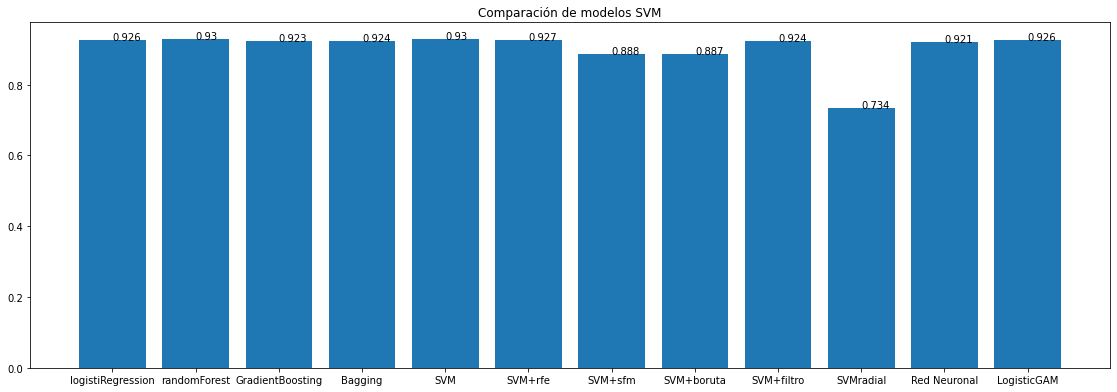

In [105]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1.2])
ax.set_title("Comparación de modelos SVM")
ejeX = ['logistiRegression','randomForest', 'GradientBoosting', 'Bagging','SVM' ,'SVM+rfe','SVM+sfm','SVM+boruta','SVM+filtro','SVMradial', 'Red Neuronal', 'LogisticGAM']
ejeY = [AUC_lr, AUC_rf, AUCGB, AUCBag, AUC_svm_lineal, AUC_svm_lineal_fs1,AUC_svm_lineal_fs2,AUC_svm_lineal_boruta,AUC_svm_lineal_mi, AUC_svm_radial,AUC_RN, AUC_gam]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i], round(y[i],3))
addlabels(ejeX,ejeY,plt)
plt.show()

Como se puede observar, con el preprocesamiento de datos realizado y las variables seleccionadas para entrenar los modelos, **Randomforest**, a más de ser el modelo con mejor AUC de 0.95, tambien tiene  la mejor exactitud y precision por el orden de 90%.

#7.Análisis de relevancia de la solución y aportes ofrecidos

Bajo el entendido de que el diagnostico de fallas cardiacas se realiza con métodos convencionales y que para su  clasificación  existen  combinación  de  puntajes  de  riesgo  y  biomarcadores  con rendimiento diagnóstico AUC de hasta 0.74; el machine learning ofrece una gamma de opciones muy interesantes para poder diagnosticar la falla cardiaca con un mejor AUC alcanzo precision y exactitud del 90%, y de forma mas sencilla, puede ser escalable y suceptible de ser utilizado rápidamente con muchos pacientes si se cuenta con datos de sus exámenes de laboratorio y algunos datos básicos, lo cual supondria una herramienta más para la medicina en la busqueda no solo de curar sino de prevenir problemas mayores a causa de tener una alta probabilidad de padecer fallas cardiacas.  

Como se comentaba a futuro se esperaria que el modelo implementado pudiese ser utilizado como una ayuda médica, pero con ciertas limitaciones, púes el modelo se entreno con un volumen bajo de datos conformado por 5 centros de salud cardiovascular de paises distintos a Colombia y no parece poder ser representativa como para generalizarlo. Seria intersante poder entrenar y probar modelos con datos de Colombia lo cual es un reto por el dificil acceso a estos datos.

## AUTO AI

In [ ]:
from tpot import TPOTClassifier

In [ ]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
tpot.fit(XTrain_df, yTrain_df)
print(tpot.score(XTest_df, yTest_df))

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8720588235294118

Generation 2 - Current best internal CV score: 0.875

Generation 3 - Current best internal CV score: 0.8779411764705882

Generation 4 - Current best internal CV score: 0.8794117647058824

Generation 5 - Current best internal CV score: 0.8794117647058824

Best pipeline: RandomForestClassifier(LinearSVC(LinearSVC(input_matrix, C=10.0, dual=True, loss=hinge, penalty=l2, tol=0.01), C=0.0001, dual=False, loss=squared_hinge, penalty=l1, tol=0.0001), bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=8, min_samples_split=4, n_estimators=100)
0.8928571428571429


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42,scoring="roc_auc")
tpot.fit(XTrain_df, yTrain_df)
print(tpot.score(XTest_df, yTest_df))

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9317474048442907

Generation 2 - Current best internal CV score: 0.9317474048442907

Generation 3 - Current best internal CV score: 0.9318339100346021

Generation 4 - Current best internal CV score: 0.9318339100346021

Generation 5 - Current best internal CV score: 0.9323529411764706

Best pipeline: ExtraTreesClassifier(LinearSVC(input_matrix, C=10.0, dual=True, loss=hinge, penalty=l2, tol=1e-05), bootstrap=True, criterion=entropy, max_features=0.2, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
0.9508574263038548


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


## ExtraTreesClassifier(RobustScaler(PCA))

                        PC0       PC1       PC2       PC3       PC4       PC5  \
Age                0.277196  0.152164 -0.096659 -0.101531  0.202411 -0.472125   
RestingBP          0.125348  0.066257 -0.344089 -0.146629  0.288719 -0.502139   
Cholesterol       -0.125649 -0.183286 -0.603999 -0.045633 -0.020585  0.036338   
FastingBS          0.190072  0.192463  0.314285 -0.017780  0.314715 -0.203030   
MaxHR             -0.331042  0.037456 -0.233449  0.083533  0.124762  0.230845   
Oldpeak            0.327107 -0.120903 -0.275136 -0.050345  0.087716  0.103326   
Sex_M              0.171709  0.060631  0.408228 -0.088686 -0.103602  0.072870   
ChestPainType_ATA -0.260943 -0.127000 -0.000478 -0.548944 -0.192906 -0.114243   
ChestPainType_NAP -0.073936  0.205339 -0.093482  0.749116 -0.031941 -0.173947   
ChestPainType_TA   0.001345  0.089686  0.020644 -0.132668  0.748047  0.448127   
RestingECG_Normal -0.122386 -0.580711  0.287870  0.091403  0.156703 -0.244671   
RestingECG_ST      0.192420 

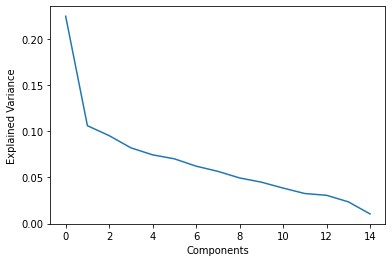

In [ ]:
XEscaladoTrain=(XTrain_df-XTrain_df.mean())/XTrain_df.std()
p=XTrain_df.shape[1]
pca = PCA(n_components=p,iterated_power=5, svd_solver="randomized").fit(XEscaladoTrain)
A=pca.components_
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(XEscaladoTrain.columns))],
index=XEscaladoTrain.columns)
print(loadings)
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()

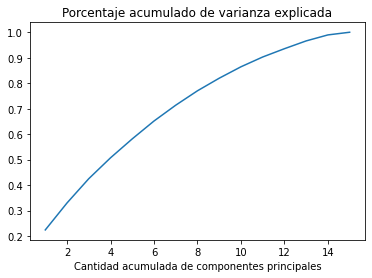

In [ ]:
plt.plot(range(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Cantidad acumulada de componentes principales')
plt.title('Porcentaje acumulado de varianza explicada')
plt.show()

In [ ]:
nComponentesElegidas=8
#XEscaladoTrain=XEscaladoTrain.reset_index(drop=True)
ZTotalTrain=XEscaladoTrain.dot(A)
ZTrain = ZTotalTrain.iloc[:,:nComponentesElegidas]

transformer = RobustScaler().fit(ZTrain)
zstrain = transformer.transform(ZTrain)

clf = ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=1.0, min_samples_leaf=2, min_samples_split=8, n_estimators=100)
clf.fit(zstrain,yTrain_df)


ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_features=1.0,
                     min_samples_leaf=2, min_samples_split=8)

In [ ]:
XEscaladoTest=(XTest_df-XTest_df.mean())/XTest_df.std()

ZTotalTest=XEscaladoTest.dot(A)
ZTest = ZTotalTest.iloc[:,:nComponentesElegidas]
zstest = transformer.transform(ZTest)

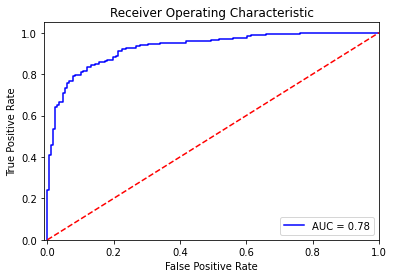

In [ ]:
prediccionesProb=clf.predict(zstest[:,:nComponentesElegidas])
prediccionesProb=clf.predict_proba(zstest[:,:nComponentesElegidas])

fpr, tpr, thresholds = metrics.roc_curve(yTest_df, prediccionesProb[:,1], pos_label=1)
AUC_ExtraTrees = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_svm_radial)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

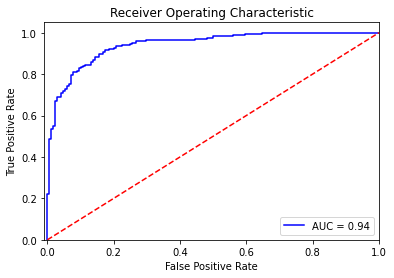

Matriz de confusión
[[146  22]
 [ 23 145]]
accuracy
0.8660714285714286
precision
0.8660843992488396
F1 score: 0.8656716417910446


In [ ]:
clfGB= GradientBoostingClassifier(learning_rate=0.1, max_depth=6, max_features=0.6500000000000001, min_samples_leaf=19, min_samples_split=11, n_estimators=100, subsample=0.9500000000000001,random_state=0)
clfGB.fit(XTrain_df, yTrain_df)


pred=clfGB.predict(XTest_df)
prediccionGB=clfGB.predict_proba(XTest_df)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df, prediccionGB, pos_label=0)
AUCGB=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCGB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("Matriz de confusión")
print(confusion_matrix(y_true=yTest_df, y_pred=pred))

accuracy=accuracy_score(y_true=yTest_df, y_pred=pred)
print("accuracy")
print(accuracy)

precision=precision_score(y_true=yTest_df, y_pred=pred,average="weighted")
print("precision")
print(precision)
RF1 = metrics.f1_score(yTest_df,pred)
print("F1 score: " + str(RF1))

#Referencias

1.UpToDate. Epidemiology and causes of heart failure. Internet. Literature review current through: Jan 2022. 

2.https://www.cdc.gov/heartdisease/heart_failure.htm#:~:text=About%206.2%20million%20adults%20in%20the%20United%20States%20have%20heart%20failure.&text=In%202018%2C%20heart%20failure%20was,379%2C800%20death%20certificates%20(13.4%25). 

3.Gómez E . Introducción, epidemiología de la falla cardiaca e historia de las clínicas de falla cardiaca en Colombia. Rev Colomb Cardiol. 2016;23(S1):6-12. 

4.Adler ED, Voors AA, Klein L, Macheret F, Braun OO, Urey MA, Zhu W, Sama I, Tadel M, Campagnari C, Greenberg B, Yagil A. Improving risk prediction in heart failure using machine learning. Eur J Heart Fail. 2020 Jan;22(1):139-147. doi: 10.1002/ejhf.1628. Epub 2019 Nov 12.  

5.https://ieee-dataport.org/open-access/heart-disease-dataset-comprehensive 